# <h1 align="center"><font color="red">Vibration Analysis: Dados Globais ou Métricas Globais</font></h1>

<font color="pink">Senior Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

# <font color="gree">Dados Globais</font>

<font color="orange">Dados globais, no contexto de análise de vibração, `são medidas estatísticas que resumem as características gerais de um sinal de vibração em um único valor numérico`. Esses valores fornecem uma visão geral do estado vibratório de uma máquina ou equipamento, sem entrar nos detalhes específicos das frequências individuais presentes no sinal.</font>


<font color="red">Tipos de Dados Globais:</font>

* `Valor RMS (Root Mean Square):`

    * É o tipo mais comum de dado global em análise de vibração.

    * Representa a energia média do sinal de vibração.

    * Calculado pela raiz quadrada da média dos quadrados dos `valores instantâneos` do sinal.

    * Unidades: geralmente `mm/s para velocidade` ou `g para aceleração`.

* `Valor de Pico:`

    * Representa a amplitude máxima do sinal de vibração em um determinado período.

    * Útil para detectar impactos ou eventos transitórios de curta duração.

* `Valor Pico a Pico:`

    * É a diferença entre o valor máximo positivo e o valor máximo negativo do sinal.

    * Fornece informação sobre a faixa total de movimento da vibração.

* `Fator de Crista:`

    * É a razão entre o `valor de pico` e o `valor RMS`.

    * Indicador útil para detectar falhas incipientes, especialmente em `rolamentos`.


<font color="red">Aplicações dos Dados Globais:</font>

* `Monitoramento de Tendências:`

    * Os dados globais são excelentes para acompanhar a evolução da vibração ao longo do tempo.

    * `Permitem a criação de gráficos de tendência` que mostram como a vibração geral da máquina está mudando.

* `Alarmes e Alertas:`

    * Valores globais são frequentemente usados para configurar alarmes em sistemas de monitoramento contínuo.

    * Limites de alerta e alarme podem ser definidos com base em normas (como `ISO 10816`) ou na experiência operacional.

* `Avaliação Rápida da Condição da Máquina:`

    * Fornecem uma indicação rápida e simples do estado geral da máquina.

    * Úteis para comparações rápidas entre `máquinas similares` ou com `dados históricos`.

* `Triagem de Problemas:`

    * Podem ser usados como primeiro passo na identificação de máquinas que precisam de análise mais detalhada.


<font color="red">Vantagens e Limitações:</font>

* `Vantagens:`

    * Fáceis de entender e interpretar, mesmo por pessoal não especializado.

    * Requerem menos armazenamento de dados comparado a espectros completos.

    * Eficientes para monitoramento de longo prazo e detecção de mudanças graduais.

* `Limitações:`

    * Não fornecem informações detalhadas sobre as frequências específicas presentes na vibração.

    * `Podem mascarar problemas em estágios iniciais que seriam visíveis em uma análise espectral`.

<font color="red">Uso na Manutenção Preditiva:</font>

* Os dados globais são frequentemente o primeiro nível de análise em programas de manutenção preditiva.

* Permitem o acompanhamento de um grande número de pontos de medição com relativa simplicidade.

* Quando os valores globais indicam uma mudança significativa, análises mais detalhadas (`como análise espectral ou de envelope`) são realizadas.


<font color="red">Coleta e Análise:</font>


* Geralmente coletados em três direções ortogonais (`axial`, `radial horizontal` e `radial vertical`) em cada ponto de medição.

* Podem ser coletados com medidores portáteis ou sistemas de monitoramento online.

* A análise de tendência é crucial, comparando os valores atuais com o histórico da máquina e com limites pré-estabelecidos.


<font color="red">Integração com Outras Técnicas:</font>


* Dados globais são frequentemente usados em conjunto com outras técnicas de análise de vibração.

* Servem como um "gatilho" para investigações mais aprofundadas quando necessário.


Entender bem o conceito e aplicação dos dados globais é fundamental para uma eficiente estratégia de manutenção preditiva baseada em análise de vibração. Eles fornecem uma visão geral rápida e eficaz do estado da máquina, permitindo um monitoramento contínuo e eficiente de grandes parques de máquinas.


Valor RMS: 0.8448
Valor de Pico: 1.8333
Valor Pico a Pico: 3.5790
Fator de Crista: 2.1702


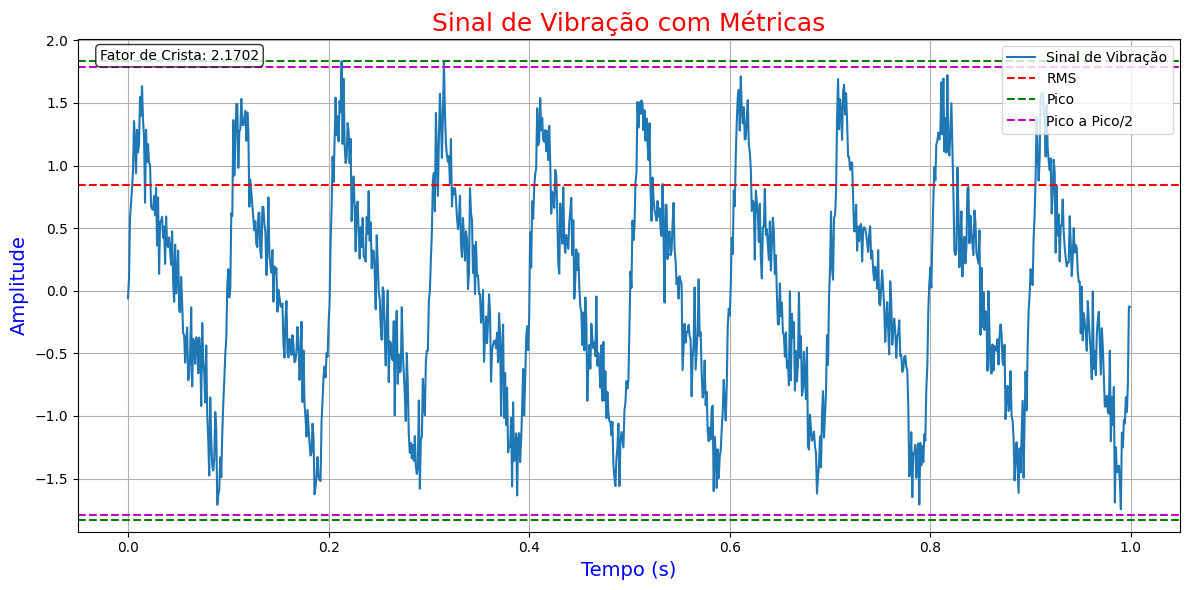

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Função para gerar um sinal de vibração simulado:
def generate_vibration_signal(n_samples, sampling_rate): # Cria um sinal sintético que simula uma vibração real.
    t = np.linspace(0, n_samples/sampling_rate, n_samples, endpoint=False)
    signal = (
        np.sin(2 * np.pi * 10 * t) +  # Componente fundamental
        0.5 * np.sin(2 * np.pi * 20 * t) +  # Primeiro harmônico (20 Hz)
        0.3 * np.sin(2 * np.pi * 30 * t) +  # Segundo harmônico (30 Hz)
        0.2 * np.random.randn(n_samples)  # Ruído aleatório
    )
    return t, signal

# Função para calcular o valor RMS, O RMS é importante porque representa a energia média do sinal de vibração.
def calculate_rms(signal): # Implementa a fórmula do RMS (raiz quadrada da média dos quadrados dos valores).
    return np.sqrt(np.mean(np.square(signal)))

# Função para calcular o Valor de Pico
def calculate_peak_value(signal): # Encontra o maior valor absoluto no sinal.
    return np.max(np.abs(signal)) # O valor de pico é útil para detectar eventos transientes ou impactos no sinal de vibração.

# Função para calcular o Valor de Pico a Pico
def calculate_peak_to_peak(signal): # Subtrai o valor mínimo do valor máximo do sinal.
    return np.max(signal) - np.min(signal) # Este valor representa a amplitude total da vibração, útil para entender o deslocamento máximo.

# Função para calcular o Fator de Crista
def calculate_crest_factor(signal): # Divide o valor de pico pelo valor RMS.
    rms = calculate_rms(signal)
    peak = calculate_peak_value(signal) # Um fator de crista alto pode indicar impactos ou falhas incipientes, especialmente em rolamentos.
    return peak / rms if rms != 0 else 0 # Um aumento neste valor pode indicar o início de falhas em rolamentos ou engrenagens antes que sejam visíveis no RMS.

# Parâmetros do sinal
n_samples = 1000
sampling_rate = 1000  # Hz
# Gerar sinal de vibração simulado
t, vibration_signal = generate_vibration_signal(n_samples, sampling_rate)

# Calcular valores globais
rms_value = calculate_rms(vibration_signal)
peak_value = calculate_peak_value(vibration_signal)
peak_to_peak_value = calculate_peak_to_peak(vibration_signal)
crest_factor = calculate_crest_factor(vibration_signal)

# Imprimir resultados
print(f"Valor RMS: {rms_value:.4f}")
print(f"Valor de Pico: {peak_value:.4f}")
print(f"Valor Pico a Pico: {peak_to_peak_value:.4f}")
print(f"Fator de Crista: {crest_factor:.4f}")

# Plotar o sinal e as métricas
plt.figure(figsize=(12, 6))
plt.plot(t, vibration_signal, label='Sinal de Vibração')
plt.axhline(y=rms_value, color='r', linestyle='--', label='RMS')
plt.axhline(y=peak_value, color='g', linestyle='--', label='Pico')
plt.axhline(y=-peak_value, color='g', linestyle='--')
plt.axhline(y=peak_to_peak_value/2, color='m', linestyle='--', label='Pico a Pico/2')
plt.axhline(y=-peak_to_peak_value/2, color='m', linestyle='--')

# Adicionar anotação para o Fator de Crista
plt.text(0.02, 0.98, f'Fator de Crista: {crest_factor:.4f}', 
         transform=plt.gca().transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title('Sinal de Vibração com Métricas', c="r", size="18")
plt.xlabel('Tempo (s)', c="b", size="14")
plt.ylabel('Amplitude', c="b", size="14")
plt.legend(loc="upper right")
plt.tight_layout()
plt.grid(True)
plt.show()

# <font color="gree">Análise Espectral</font>

<font color="orange">A análise espectral é uma técnica que transforma o sinal de vibração do domínio do `tempo` para o domínio da `frequência`. Isso permite identificar as frequências específicas presentes no sinal de vibração.</font>

`Importância:`

* Permite identificar a origem de problemas específicos em máquinas rotativas.

* Facilita a distinção entre `diferentes fontes de vibração`.

* Ajuda a detectar falhas incipientes antes que se tornem críticas.

`Transformada de Fourier:`

* A análise espectral é geralmente realizada usando a `Transformada Rápida de Fourier` (FFT).

* A `FFT` decompõe o sinal de vibração em suas componentes de frequência.


<font color="red">Harmônicos</font>

Harmônicos são múltiplos inteiros da `frequência fundamental` (geralmente a frequência de rotação da máquina).

* `1X:`O primeiro harmônico ou frequência fundamental (frequência de rotação)

* `2X:` Segundo harmônico (duas vezes a frequência de rotação)

* `3X:` Terceiro harmônico (três vezes a frequência de rotação), `e assim por diante`.


<font color="red">Interpretação dos Harmônicos</font>


* `1X (Frequência de rotação):` A presença de uma forte componente em `1X` no espectro de vibração geralmente está associada a:

    * `Desbalanceamento:` 
    
    Um pico claro em `1X` é o principal sintoma de `desbalanceamento rotacional`, onde a massa do rotor está desequilibrada, causando vibração na frequência de rotação.

    * `Excentricidade:` 
    
    Vibração causada por uma excentricidade no rotor (`centro de massa fora do eixo de rotação`).

    `Exemplo prático: Se você observar um aumento significativo em 1X, a primeira suspeita deve ser desbalanceamento.`


* `2X (Segundo Harmônico):` O `2X` é geralmente associado a:

    * `Desalinhamento angular:` 
    
    Quando os eixos de duas partes rotativas da máquina não estão alinhados adequadamente, gerando forças cíclicas que vibram em `2X`.

    * `Flexão de eixo:` 
    
    Um eixo ligeiramente torto ou flexionado pode causar um aumento de vibração em `2X`.

    `Exemplo prático: Um pico em 2X pode indicar que há desalinhamento entre o motor e a bomba, ou outros componentes rotativos acoplados.`


* `Múltiplos harmônicos:` Podem indicar folgas mecânicas ou problemas de fixação.

* `Harmônicos fracionários:` Podem indicar problemas em `rolamentos` ou engrenagens.

## <font color="blue">Simulando uma `falha de Desbalanceamento`</font>

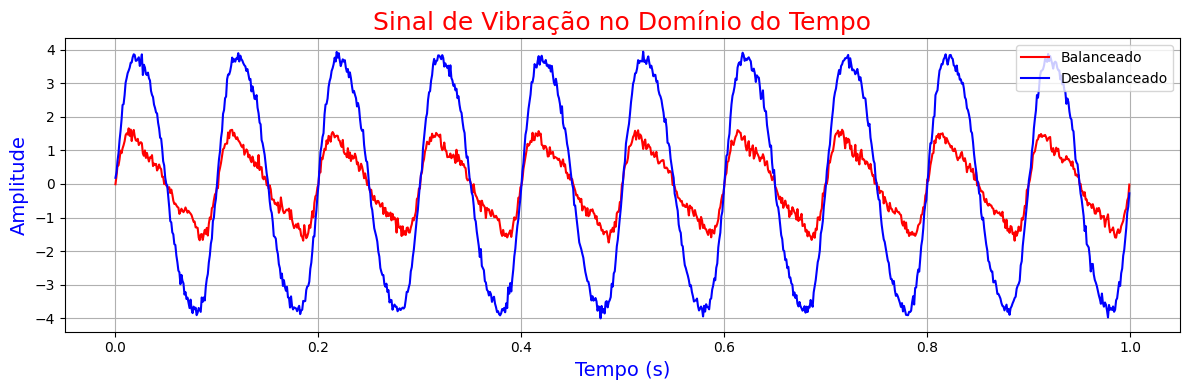

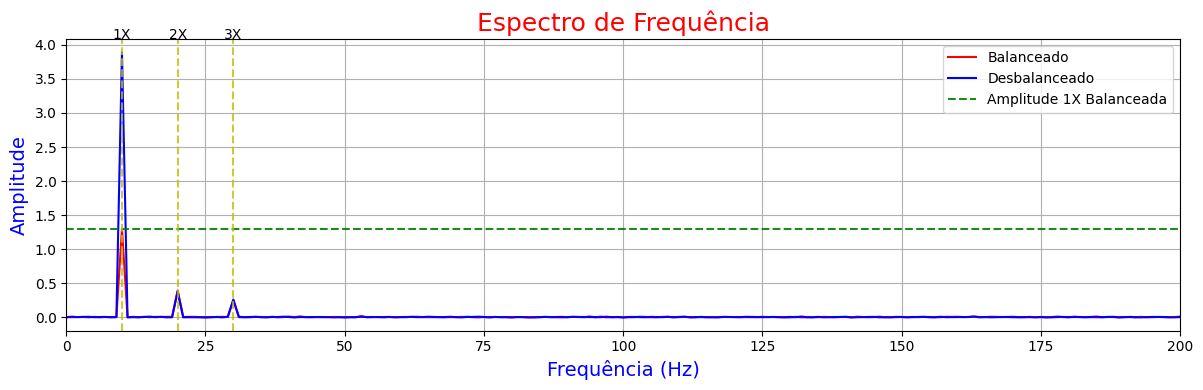

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def generate_vibration_signal(t, freq, amplitude, noise_level=0.1, unbalance=False):
    signal = amplitude * np.sin(2 * np.pi * freq * t)
    if unbalance:
        # Aumenta a amplitude da frequência fundamental para simular desbalanceamento:
        signal *= 3
    # Adiciona harmônicos e ruído:
    signal += 0.3 * amplitude * np.sin(2 * np.pi * 2 * freq * t)  # 2X
    signal += 0.2 * amplitude * np.sin(2 * np.pi * 3 * freq * t)  # 3X
    signal += noise_level * np.random.randn(len(t))
    return signal

def plot_time_domain(t, signal_balanced, signal_unbalanced):
    plt.figure(figsize=(12, 4))
    plt.plot(t, signal_balanced, label='Balanceado', c="r")
    plt.plot(t, signal_unbalanced, label='Desbalanceado', c="b")
    plt.title('Sinal de Vibração no Domínio do Tempo', c="r", size="18")
    plt.xlabel('Tempo (s)', c="b", size="14")
    plt.ylabel('Amplitude', c="b", size="14")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

def plot_frequency_domain(t, signal_balanced, signal_unbalanced, freq):
    n = len(t)
    fft_balanced = fft(signal_balanced)
    fft_unbalanced = fft(signal_unbalanced)
    xf = fftfreq(n, t[1] - t[0])[:n//2]
    
    # Calcula a amplitude da frequência fundamental para o sinal balanceado:
    fundamental_freq_index = np.argmin(np.abs(xf - freq))
    fundamental_amplitude_balanced = 2.0/n * np.abs(fft_balanced[fundamental_freq_index])

    plt.figure(figsize=(12, 4))
    plt.plot(xf, 2.0/n * np.abs(fft_balanced[0:n//2]), label='Balanceado', c="r")
    plt.plot(xf, 2.0/n * np.abs(fft_unbalanced[0:n//2]), label='Desbalanceado', c="b")

    # Adiciona a linha horizontal segmentada:
    plt.axhline(y=fundamental_amplitude_balanced, color='g', linestyle='--', alpha=0.9, 
                label='Amplitude 1X Balanceada')
    
    plt.title('Espectro de Frequência', c="r", size="18")
    plt.xlabel('Frequência (Hz)', c="b", size="14")
    plt.ylabel('Amplitude', c="b", size="14")
    plt.legend()
    plt.tight_layout()
    plt.xlim(0, 200)
    plt.grid(True)
    
    # Adiciona anotações para os harmônicos:
    for i in range(1, 4):
        plt.axvline(x=i*freq, color='y', linestyle='--', alpha=0.8)
        plt.text(i*freq, plt.ylim()[1], f'{i}X', horizontalalignment='center')
    
    plt.show()

# Parâmetros da simulação:
duration = 1.0  # segundos
sample_rate = 1000  # Hz
n_samples = int(duration * sample_rate)
t = np.linspace(0, duration, n_samples, endpoint=False)
freq = 10  # Hz (frequência de rotação)
amplitude = 1.3

# Gerar sinais:
signal_balanced = generate_vibration_signal(t, freq, amplitude)
signal_unbalanced = generate_vibration_signal(t, freq, amplitude, unbalance=True)

# Plotar sinais no domínio do tempo:
plot_time_domain(t, signal_balanced, signal_unbalanced)

# Plotar sinais no domínio da frequência:
plot_frequency_domain(t, signal_balanced, signal_unbalanced, freq)